Optimal number of principal components: 2


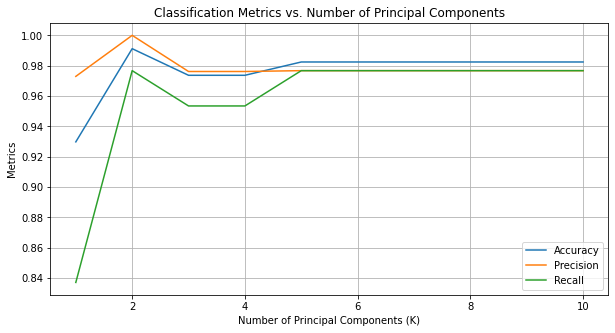

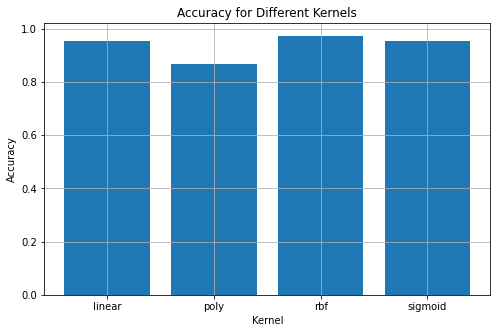

In [14]:
#PROBLEM 1

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

data = pd.read_csv('cancer.csv')

numeric_columns = data.iloc[:, 2:]

imputer = SimpleImputer(strategy='median')
numeric_columns = imputer.fit_transform(numeric_columns)

imputed_data = pd.DataFrame(numeric_columns)

data = pd.concat([data[['id', 'diagnosis']], imputed_data], axis=1)

X = data.iloc[:, 2:].values
y = (data.iloc[:, 1] == 'M').astype(int)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Task 1: Identify the optimal number of principal components (K)
K_values = list(range(1, 11))
best_accuracy = 0
best_K = 0

for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_K = K

print(f"Optimal number of principal components: {best_K}")

# Task 2: Plot classification accuracy, precision, and recall over different K values
K_values = list(range(1, 11))
accuracies = []
precisions = []
recalls = []

for K in K_values:
    pca = PCA(n_components=K)
    X_pca = pca.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
    
    svm = SVC(kernel='linear')
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)

plt.figure(figsize=(10, 5))
plt.plot(K_values, accuracies, label='Accuracy')
plt.plot(K_values, precisions, label='Precision')
plt.plot(K_values, recalls, label='Recall')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Metrics')
plt.title('Classification Metrics vs. Number of Principal Components')
plt.legend()
plt.grid()
plt.show()

# Task 3: Explore different kernel tricks
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_accuracies = []

for kernel in kernels:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    svm = SVC(kernel=kernel)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    kernel_accuracies.append(accuracy)

plt.figure(figsize=(8, 5))
plt.bar(kernels, kernel_accuracies)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Kernels')
plt.grid()
plt.show()


In [18]:
#PROBLEM 2
import pandas as pd

csv_file_path = "housing.csv"

df = pd.read_csv(csv_file_path)
print(df.head()) 
    
columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for column in columns_to_convert:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [17]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,3
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,2
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,3
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,1


Mean Squared Error: 5565700390823.91
R-squared: -0.10


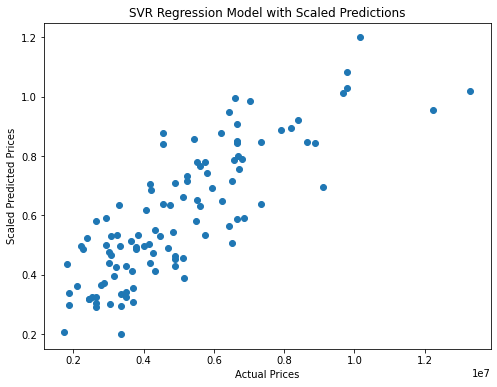

In [72]:
#Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

data = df

X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = data['price']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

min_max_scaler = MinMaxScaler(feature_range=(0.2, 1.2))
y_pred_scaled = min_max_scaler.fit_transform(y_pred.reshape(-1, 1))

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the regression model with predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_scaled)
plt.xlabel("Actual Prices")
plt.ylabel("Scaled Predicted Prices")
plt.title("SVR Regression Model with Scaled Predictions")
plt.show()


Mean Squared Error: 5565648082359.89
R-squared (R2) Score: -0.10111202557096344


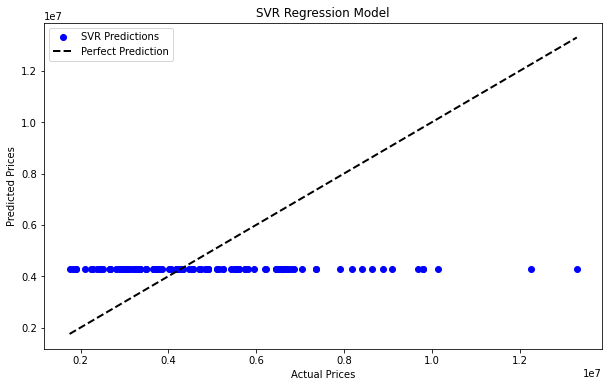

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

csv_file_path = "housing.csv"
df = pd.read_csv(csv_file_path)

columns_to_convert = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for column in columns_to_convert:
    df[column] = df[column].replace({'yes': 1, 'no': 0})

df['furnishingstatus'] = df['furnishingstatus'].replace({'furnished': 1, 'semi-furnished': 2, 'unfurnished': 3})

X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, c='blue', label='SVR Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("SVR Regression Model")
plt.legend()
plt.show()


Optimum number of principal components (K): 1
R-squared (R2) Score for K=1: -0.10110632334359893


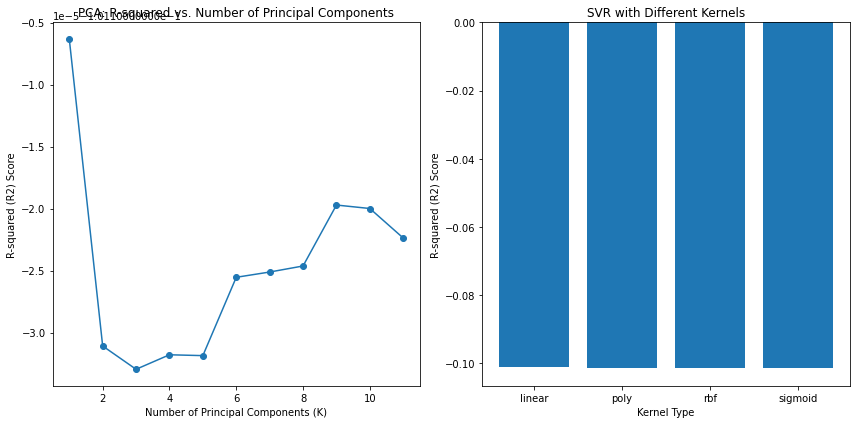

In [73]:
#TASK 3 & 4 below

# Task 3: PCA Feature Extraction and Identifying Optimum Number of Principal Components
from sklearn.decomposition import PCA

r2_scores = []

K_range = range(1, 12)  # You can adjust this range based on your dataset

for K in K_range:
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    svr = SVR(kernel='linear')
    svr.fit(X_train_pca, y_train)

    y_pred = svr.predict(X_test_pca)

    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

optimal_K = K_range[r2_scores.index(max(r2_scores))]
print(f"Optimum number of principal components (K): {optimal_K}")
print(f"R-squared (R2) Score for K={optimal_K}: {max(r2_scores)}")

#Task 4, different kernel tricks
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

r2_scores_kernels = []

for kernel in kernel_types:
    svr = SVR(kernel=kernel)
    svr.fit(X_train, y_train)
    y_pred = svr.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores_kernels.append(r2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, r2_scores, marker='o')
plt.title('PCA: R-squared vs. Number of Principal Components')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('R-squared (R2) Score')

plt.subplot(1, 2, 2)
plt.bar(kernel_types, r2_scores_kernels)
plt.title('SVR with Different Kernels')
plt.xlabel('Kernel Type')
plt.ylabel('R-squared (R2) Score')

plt.tight_layout()
plt.show()
